# Exercise 3-1: Create some plots

In [9]:
import pandas as pd

## Get the data

In [11]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [13]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


## Visualize the data

<Axes: xlabel='Year', ylabel='DeathRate'>

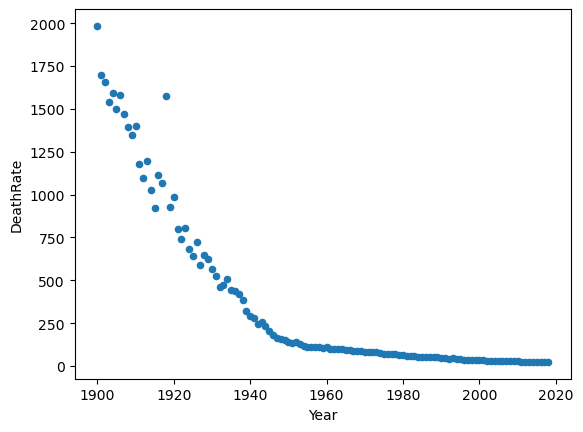

In [15]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<Axes: xlabel='Year'>

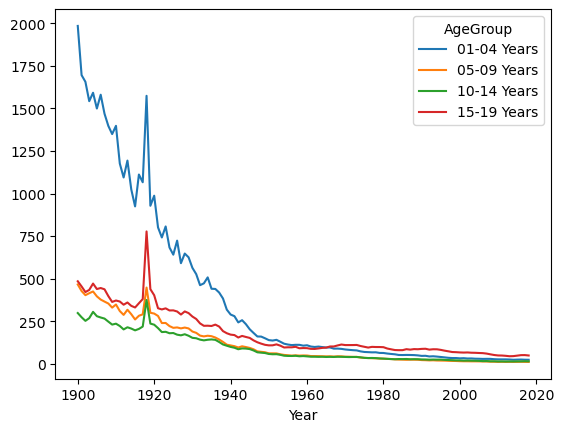

In [17]:
mortality_wide.plot()

<Axes: title={'center': 'Death Rates for Age Group 15-19 Years Over Time'}, xlabel='Year'>

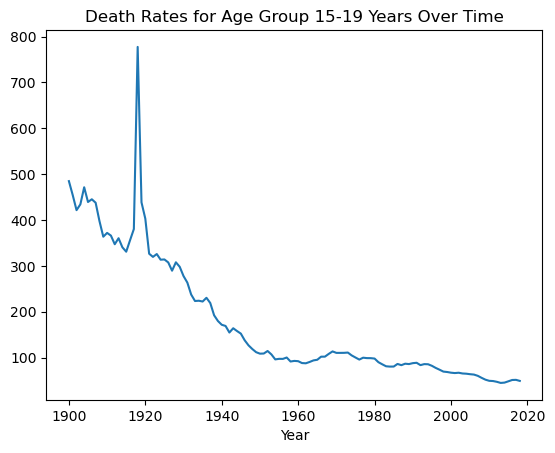

In [37]:
# 3. Use the wide data to create a line plot for just the data in the 15-19 age group. Include an appropriate title on the plot and remove the legend.
#mortality_wide.plot(kind='line', title='Death Rates for Age Group 15-19 Years Over Time', ylabel='Deaths per 100,000', grid=True, legend=False)

mortality_wide.plot.line(y=['15-19 Years'], title='Death Rates for Age Group 15-19 Years Over Time', legend = False) 

<Axes: xlabel='Year'>

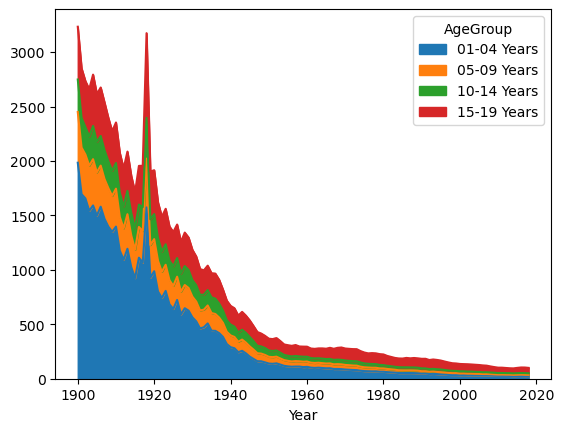

In [70]:
# 4. Use the wide data to create an area plot for all age groups, and reverse the order of the items in the legend to see how that looks.

mortality_wide.plot.area()

<Axes: title={'center': 'the mortality rates for the year 1900'}, xlabel='Year', ylabel='Death Rates'>

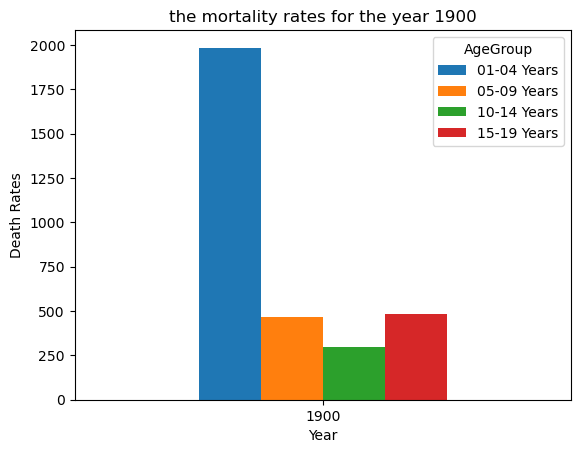

In [68]:
# 5. Use the wide data to create a bar plot for all age groups that shows the mortality rates for just the year 1900, and note the values on the y-axis.

mortality_wide.query('Year == 1900').plot.bar(title='the mortality rates for the year 1900', ylabel='Death Rates', rot=0) 

<Axes: title={'center': 'the mortality rates for the year 2000'}, ylabel='Death Rates'>

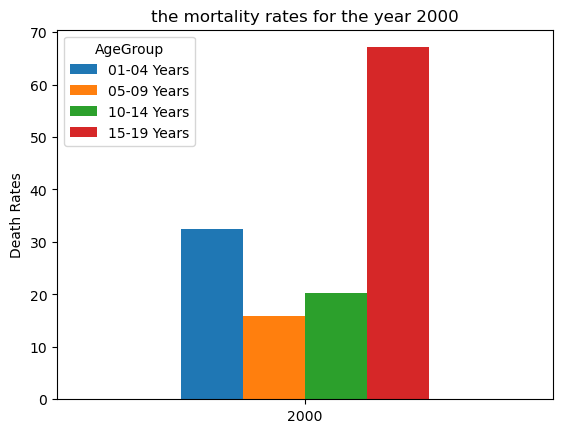

In [88]:
# 6. Change the bar plot you created in step 5 to show the mortality rates for the year 2000, and note how the values on the y-axis change. 
#    Then, add an appropriate title to the plot and remove the label for the x-axis.

mortality_wide.query('Year == 2000').plot.bar(title='the mortality rates for the year 2000', xlabel='', ylabel='Death Rates', rot=0) 

<Axes: title={'center': 'Mortality Rates by Age Group in 2000 (Long Data Format)'}, ylabel='Death Rates'>

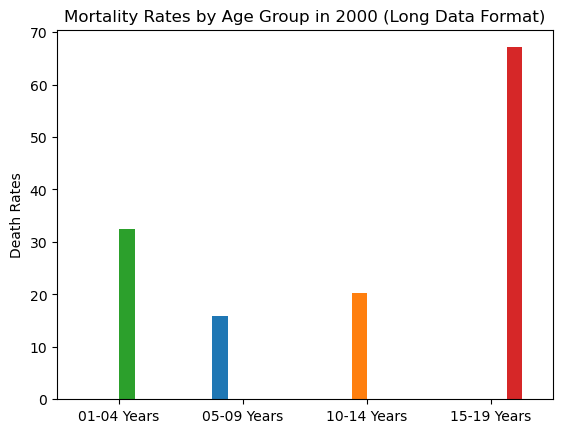

In [108]:
# 7. Use the long data to create a bar plot like the one in step 6. To do that, you’ll need to chain the pivot() method to the query() method. 
#    Compare the two bar charts, and then make improvements so the plot that uses the long data is easier to read.

# mortality_data.query('Year == 2000').plot.bar(x='AgeGroup', y='DeathRate',title='Mortality Rates by Age Group in 2000 (Long Data Format)', xlabel='', ylabel='Death Rates', rot=0)

mortality_data.query('Year == 2000').pivot(index='AgeGroup', columns='DeathRate', values='DeathRate').plot(
    kind='bar',
    title='Mortality Rates by Age Group in 2000 (Long Data Format)',
    xlabel='',
    ylabel='Death Rates',
    legend=False,
    rot=0
)

<Axes: ylabel='Frequency'>

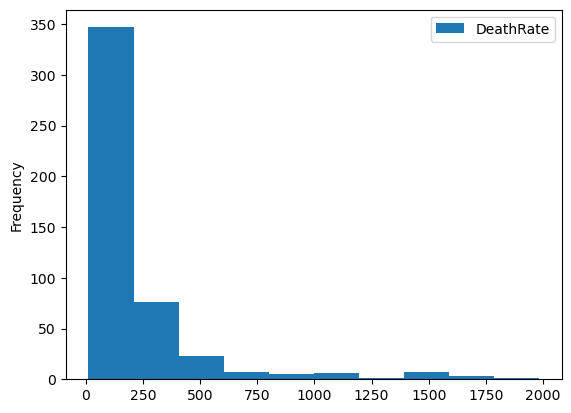

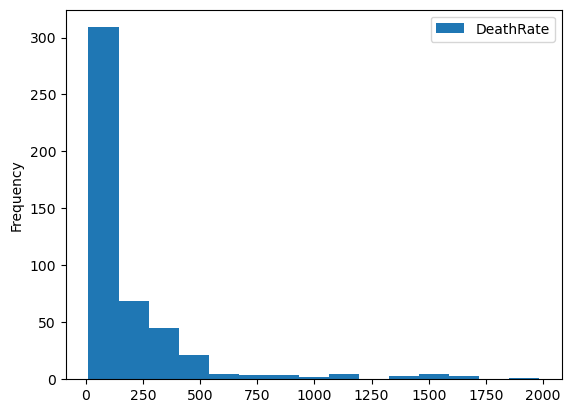

In [114]:
# 8. Use the long data to create a histogram that shows the frequency of the death rates in the default number of bins. 
#   Then, change the number of bins to 15 to see how this changes the histogram. Does this make it easier to determine the frequency at various datapoints?

mortality_data.plot.hist(y='DeathRate')
mortality_data.plot.hist(y='DeathRate', bins=15)

<Axes: title={'center': 'The distribution of the death rates in the year 1900'}, ylabel='Density'>

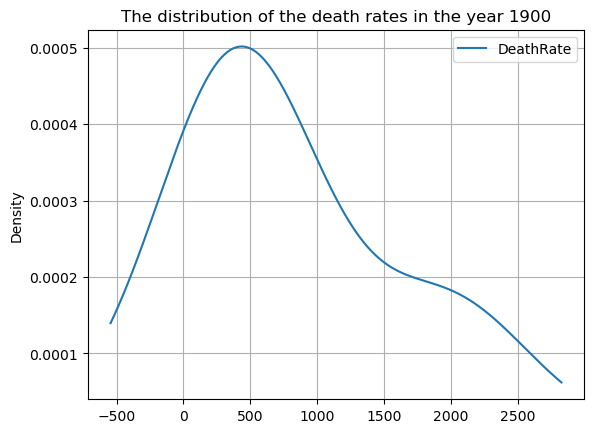

In [123]:
# 9. Use the long data to create a density plot that shows the distribution of the death rates in the year 1900. 
#    Include a title and grids in the plot to make the data easier to read.

mortality_data.query('Year == 1900').plot.density(y='DeathRate', title='The distribution of the death rates in the year 1900', grid = True)

<Axes: ylabel='DeathRate'>

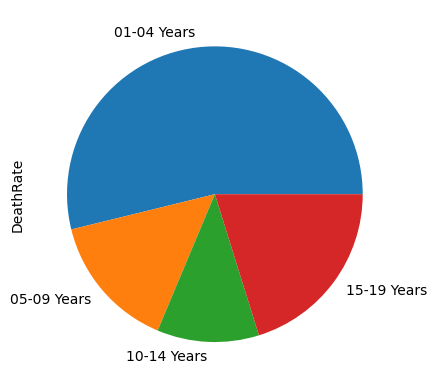

In [135]:
# 10. Use the long data to create a pie plot that shows the sum of the death rates for the years 1900, 1925, 1950, 1975, and 2000.

mortality_data.query('Year in (1900, 1925, 1950, 1975, 2000)').groupby('AgeGroup')['DeathRate'].sum().plot.pie()

array([[<Axes: title={'center': 'Child Mortality: 01-04'}, xlabel='Year', ylabel='Deaths per 100,000'>,
        <Axes: title={'center': 'Child Mortality: 05-09'}, xlabel='Year', ylabel='Deaths per 100,000'>],
       [<Axes: title={'center': 'Child Mortality: 10-14'}, xlabel='Year', ylabel='Deaths per 100,000'>,
        <Axes: title={'center': 'Child Mortality: 15-19'}, xlabel='Year', ylabel='Deaths per 100,000'>]],
      dtype=object)

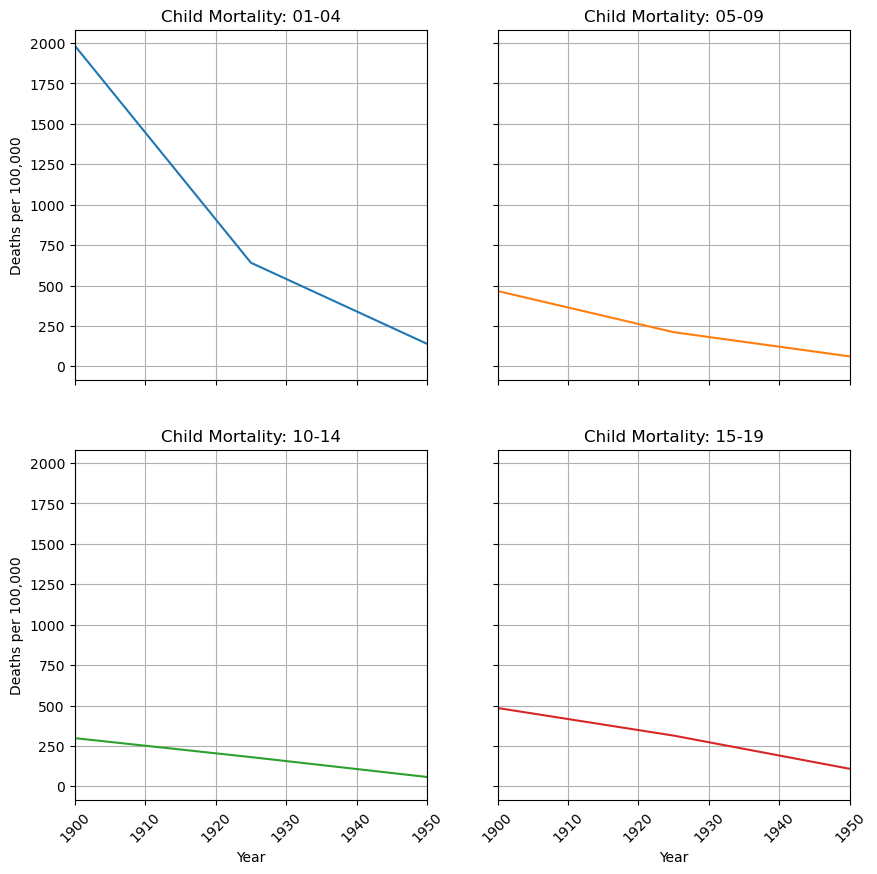

In [150]:
# 11. Create a plot with four subplots in two rows and two columns. The subplots should be horizontal bar charts that show the child mortality rates 
#     for each age group for the years 1900, 1925, 1950, 1975, and 2000. Format the subplots so they’re easy to read.

mortality_wide.query('Year in (1900, 1925, 1950, 1975, 2000)').plot.line( 
                        title=['Child Mortality: 01-04',
                                 'Child Mortality: 05-09', 
                                 'Child Mortality: 10-14',
                                 'Child Mortality: 15-19'],
                         ylabel='Deaths per 100,000', sharey=True, grid=True, rot=45, xlim=(1900,1950), legend=False, 
                         subplots=True, layout=(2,2), figsize=(10,10))
